# **OPIM 5509 : Introduction to Deep Learning**
---

### **Recurrent Neural Networks Project : Texas Energy Demand Forecasting**        

**Submitted by: Team 4**  
Aditya Gannavarapu

Piotr Krzyk

Andre Reggio

Xinbo Ye 

# Introduction

- Volatile energy costs and deregulation of the electricity production business have made electricity load forecasting a major concern for power plant operations in recent years. (Jota et al., 2011)
- Energy demand forecast has become a heated topic in recent years (Cai et al., 2018). By projecting demand load, building energy management can be a feasible task for forecasting future load demand. The energy sector use load shapes to estimate values at each point in time which displays the demand as a function of time (Price, 2010)
- Weather is a huge factor in drving the demand in energy. It's also believed that the energy demand will double by 2050 due to global increase in population. (Krishnan et al., 2021)
- Weather has always played a significant role in simple regression models to forecast energy demand data. Multiple regression, a basic approach, is used to explain the influence of weather on energy consumption. Traditional machine learning approaches, on the other hand, are becoming less effective as the requirement to estimate demand more precisely grows.
- Models (Naïve Models), Seasonal AutoRegressive Integrated Moving Averages with eXogenous regressors (SARIMAX), and Univariate Long-Short Term Memory Neural Network (LSTM) is used to explicitly deal with seasonality as a class of time-series forecasting models.
- Forecasting for energy can be a diffcult task because electricity load profiles are closely tied with uncertain, non-linear and non-stationary signals and to address these obstacles we can implement machine learning algorithm capable of learning temporal dependecies such as LSTM (Taheri et al., 2021)
- Long-term forecasts, ranging from 1 to 20 years ahead which are an imperative topic for strategic planning, new generation construction, and transmission capacity (Kandil et al. 2002). Mid-term forecasting encompassing a month to one year ahead which are applied for maintenance and power-sharing agreements scheduling (Friedrich et al. 2014). The last class, short-term load forecasting, ranging from a few hours ahead to a few weeks ahead has great importance in real-time control, plant scheduling, fuel purchasing schemes, short-term maintenance as well as short-term storage usage 2 (Friedrich et al. 2014)


- Nanomaterials Application in Biofuels and Bioenergy Production Systems 2021, Pages 677-687, by Suresh Kumar Krishnan, Senthilkumar Kandasamy, Kavitha Subbiah - https://www.sciencedirect.com/topics/engineering/global-energy-demand

- Electricity Demand Time Series Forecasting Based on Empirical Mode Decomposition and Long Short-Term Memory, 2021, Saman Taheri , Behnam Talebjedi, and Timo Laukkanen - https://www.techscience.com/energy/v118n6/44513/pdf

- Jota, P. R. S., Silva, V. R. B., & Jota, F. G. (2011)Building load management using cluster and statistical analyses. International Journal of Electrical Power and Energy Systems, 33(8), 1498– 1505 - https://doi.org/10.1016/j.ijepes.2011.06.034

- Cai, M., Pipattanasomporn, M., & Rahman, S. (2019). Day-ahead building-level load forecasts using deep learning vs. traditional time-series techniques. Applied Energy, 236, 1078–1088- https://doi.org/10.1016/j.apenergy.2018.12.042

- Kandil, M. S., El-Debeiky, S. M., & Hasanien, N. E. (2002). Long-term load forecasting for fast developing utility using a knowledge-based expert system. IEEE Transactions on Power Systems, 17(2), 491–496 - https://doi.org/10.1109/TPWRS.2002.1007923

- Friedrich, L., Armstrong, P., & Afshari, A. (2014). Mid-term forecasting of urban electricity load to isolate air-conditioning impact. Energy and Buildings, 80, 72–80. https://doi.org/10.1016/j.enbuild.2014.05.011

# Reading the demand and weather data
Make sure you subset your data to be between 2011 and 2019 - you will use data from 2020 to test your final models!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Demand Data

Read the demand data.

In [ ]:
# https://drive.google.com/file/d/1M7-XiHcfboUzKZ-tmflDomy_IuRAvnw9/view?usp=sharing
!gdown --id 1M7-XiHcfboUzKZ-tmflDomy_IuRAvnw9

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1M7-XiHcfboUzKZ-tmflDomy_IuRAvnw9
To: /content/Ercot_2011_2021_feb.csv
100% 3.52M/3.52M [00:00<00:00, 42.4MB/s]


In [ ]:
energy = pd.read_csv('Ercot_2011_2021_feb.csv') # it just downloaded locally to your workspace!
energy.head()

,Unnamed: 0,Date,HE,MWh
0,0,2010-01-01,1,32094.064435
1,1,2010-01-01,2,32171.322546
2,2,2010-01-01,3,32241.752463
3,3,2010-01-01,4,32459.193227
4,4,2010-01-01,5,33123.751047


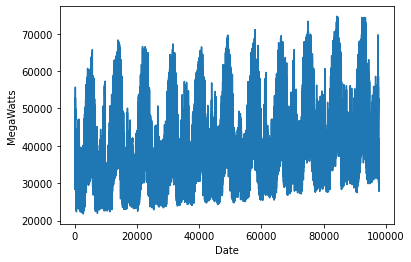

In [ ]:
# this is your target variable
energy['MWh'].plot()
plt.xlabel('Date')
plt.ylabel('MegaWatts')
plt.show()

Pretty cool - looks like energy variabes between 20K and 70K megawatts.

In [ ]:
print(energy['Date'].min())
print(energy['Date'].max())

2010-01-01
2021-03-01


In [ ]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97848 entries, 0 to 97847
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  97848 non-null  int64  
 1   Date        97848 non-null  object 
 2   HE          97848 non-null  int64  
 3   MWh         97847 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.0+ MB


In [ ]:
# Transform the Date and HE columns into string type
energy.Date = energy.Date.astype(str)
energy.HE = energy.HE.astype(str)
# Cancate the two columns and change it to datetime format
energy['Date_Time'] = pd.to_datetime(energy['Date'] + ' ' + energy['HE']+':00:00')

In [ ]:
# Transformed Date and HE into Date_time column
print(energy.info())
energy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97848 entries, 0 to 97847
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  97848 non-null  int64         
 1   Date        97848 non-null  object        
 2   HE          97848 non-null  object        
 3   MWh         97847 non-null  float64       
 4   Date_Time   97848 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 3.7+ MB
None


,Unnamed: 0,Date,HE,MWh,Date_Time
0,0,2010-01-01,1,32094.064435,2010-01-01 01:00:00
1,1,2010-01-01,2,32171.322546,2010-01-01 02:00:00
2,2,2010-01-01,3,32241.752463,2010-01-01 03:00:00
3,3,2010-01-01,4,32459.193227,2010-01-01 04:00:00
4,4,2010-01-01,5,33123.751047,2010-01-01 05:00:00


In [ ]:
# We us isna() to detect missing values and found a missing value on 2016-11-07
energy.loc[energy['MWh'].isna()]

,Unnamed: 0,Date,HE,MWh,Date_Time
60047,7463,2016-11-07,0,NaN,2016-11-07


In [ ]:
# Use forward fill to fill in the missing value since it's not in the test data range
energy.ffill(inplace=True)
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97848 entries, 0 to 97847
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  97848 non-null  int64         
 1   Date        97848 non-null  object        
 2   HE          97848 non-null  object        
 3   MWh         97848 non-null  float64       
 4   Date_Time   97848 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [ ]:
# reset the index to datetime and drop unnecessary columns
energy = energy.drop(['Unnamed: 0', 'Date', 'HE'], axis=1).set_index('Date_Time')
energy.head()

,MWh
Date_Time,
2010-01-01 01:00:00,32094.064435
2010-01-01 02:00:00,32171.322546
2010-01-01 03:00:00,32241.752463
2010-01-01 04:00:00,32459.193227
2010-01-01 05:00:00,33123.751047


In [ ]:
# resample the data into an hourly period
energy = energy.resample('H').max()
energy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97848 entries, 2010-01-01 01:00:00 to 2021-03-01 00:00:00
Freq: H
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MWh     97837 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


In [ ]:
# After resample, a few missing values pop up
# the reason is that the original data does not have values in the following 11 time periods
# additionally, resample removes the duplicated datetime, which happen to be 11 cases
energy.loc[energy['MWh'].isna()]

,MWh
Date_Time,
2010-03-14 02:00:00,NaN
2011-03-13 02:00:00,NaN
2012-03-11 02:00:00,NaN
2013-03-10 02:00:00,NaN
2014-03-09 02:00:00,NaN
2015-03-08 02:00:00,NaN
2016-03-13 02:00:00,NaN
2017-03-12 03:00:00,NaN
2018-03-11 03:00:00,NaN


In [ ]:
# since the missing values are not in between 2019 and 2020, it would be reasonable to ffill
energy.ffill(inplace=True)
energy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97848 entries, 2010-01-01 01:00:00 to 2021-03-01 00:00:00
Freq: H
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MWh     97848 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


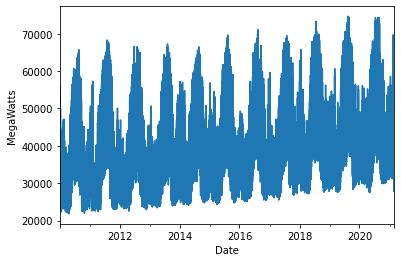

In [ ]:
# plot the power consumption
energy.MWh.plot()
plt.xlabel('Date')
plt.ylabel('MegaWatts')
plt.show()

## Weather Data

Read the weather data.

In [ ]:
# https://drive.google.com/file/d/1vl2RKquLYS1QRyYE7ySIj24jPnXFp2od/view?usp=sharing
!gdown --id 1vl2RKquLYS1QRyYE7ySIj24jPnXFp2od

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1vl2RKquLYS1QRyYE7ySIj24jPnXFp2od
To: /content/FST.csv
100% 97.2M/97.2M [00:01<00:00, 91.0MB/s]


In [ ]:
# Read the weather data.
weather = pd.read_csv('FST.csv')
print(weather.info())
weather.head(25)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581124 entries, 0 to 581123
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   station            581124 non-null  object
 1   valid              581124 non-null  object
 2   tmpf               581124 non-null  object
 3   dwpf               581124 non-null  object
 4   relh               581124 non-null  object
 5   drct               581124 non-null  object
 6   sknt               581124 non-null  object
 7   p01i               581124 non-null  object
 8   alti               581124 non-null  object
 9   mslp               581124 non-null  object
 10  vsby               581124 non-null  object
 11  gust               581124 non-null  object
 12  skyc1              581124 non-null  object
 13  skyc2              581124 non-null  object
 14  skyc3              581124 non-null  object
 15  skyc4              581124 non-null  object
 16  skyl1              5

,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,...,skyl4,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar
0,FST,2010-01-01 00:53,30.02,24.98,81.27,180.00,5.00,M,30.50,1031.80,...,M,M,M,M,M,M,M,M,24.04,METAR KFST 010553Z AUTO 18005KT 10SM CLR M01/M...
1,FST,2010-01-01 01:53,28.04,24.08,84.87,190.00,5.00,M,30.49,1031.30,...,M,M,M,M,M,M,M,M,21.69,METAR KFST 010653Z AUTO 19005KT 10SM CLR M02/M...
2,FST,2010-01-01 02:53,26.96,23.00,84.80,220.00,9.00,M,30.47,1030.90,...,M,M,M,M,M,M,M,M,17.25,METAR KFST 010753Z AUTO 22009KT 10SM CLR M03/M...
3,FST,2010-01-01 03:53,26.96,23.00,84.80,210.00,8.00,M,30.46,1030.40,...,M,M,M,M,M,M,M,M,17.90,METAR KFST 010853Z AUTO 21008KT 10SM CLR M03/M...
4,FST,2010-01-01 04:53,28.04,23.00,81.11,220.00,12.00,M,30.44,1030.00,...,M,M,M,M,M,M,M,M,16.96,METAR KFST 010953Z AUTO 22012KT 10SM CLR M02/M...
5,FST,2010-01-01 05:53,26.96,23.00,84.80,220.00,11.00,M,30.42,1029.70,...,M,M,M,M,M,M,M,M,16.10,METAR KFST 011053Z AUTO 22011KT 10SM CLR M03/M...
6,FST,2010-01-01 06:53,28.04,23.00,81.11,220.00,9.00,M,30.40,1029.20,...,M,M,M,M,M,M,M,M,18.59,METAR KFST 011153Z AUTO 22009KT 10SM CLR M02/M...
7,FST,2010-01-01 07:53,28.04,21.92,77.50,210.00,10.00,M,30.40,1029.00,...,M,M,M,M,M,M,M,M,18.00,METAR KFST 011253Z AUTO 21010KT 10SM CLR M02/M...
8,FST,2010-01-01 08:53,26.06,19.94,77.32,190.00,5.00,M,30.39,1028.90,...,M,M,M,M,M,M,M,M,19.34,METAR KFST 011353Z AUTO 19005KT 10SM CLR M03/M...
9,FST,2010-01-01 09:53,33.98,21.92,60.93,190.00,7.00,M,30.38,1028.50,...,M,M,M,M,M,M,M,M,27.19,METAR KFST 011453Z AUTO 19007KT 10SM CLR 01/M0...


In [ ]:
# convert time stamp to datetime for interpolation
weather['valid'] = pd.to_datetime(weather['valid'])
weather.dtypes

station                      object
valid                datetime64[ns]
tmpf                         object
dwpf                         object
relh                         object
drct                         object
sknt                         object
p01i                         object
alti                         object
mslp                         object
vsby                         object
gust                         object
skyc1                        object
skyc2                        object
skyc3                        object
skyc4                        object
skyl1                        object
skyl2                        object
skyl3                        object
skyl4                        object
wxcodes                      object
ice_accretion_1hr            object
ice_accretion_3hr            object
ice_accretion_6hr            object
peak_wind_gust               object
peak_wind_drct               object
peak_wind_time               object
feel                        

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581124 entries, 0 to 581123
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   station            581124 non-null  object        
 1   valid              581124 non-null  datetime64[ns]
 2   tmpf               581124 non-null  object        
 3   dwpf               581124 non-null  object        
 4   relh               581124 non-null  object        
 5   drct               581124 non-null  object        
 6   sknt               581124 non-null  object        
 7   p01i               581124 non-null  object        
 8   alti               581124 non-null  object        
 9   mslp               581124 non-null  object        
 10  vsby               581124 non-null  object        
 11  gust               581124 non-null  object        
 12  skyc1              581124 non-null  object        
 13  skyc2              581124 non-null  object  

In [ ]:
# look at the datetime range
print(weather['valid'].min())
print(weather['valid'].max())

2010-01-01 00:53:00
2021-02-19 23:55:00


In [ ]:
# set the datetime as the index so you can do interpolation later
weather.set_index(weather['valid'], inplace=True)
weather.head() # see how the valid column is now the index? this will allow
                # you to do resampling to hourly resolution

,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,...,skyl4,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar
valid,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:53:00,FST,2010-01-01 00:53:00,30.02,24.98,81.27,180.00,5.00,M,30.50,1031.80,...,M,M,M,M,M,M,M,M,24.04,METAR KFST 010553Z AUTO 18005KT 10SM CLR M01/M...
2010-01-01 01:53:00,FST,2010-01-01 01:53:00,28.04,24.08,84.87,190.00,5.00,M,30.49,1031.30,...,M,M,M,M,M,M,M,M,21.69,METAR KFST 010653Z AUTO 19005KT 10SM CLR M02/M...
2010-01-01 02:53:00,FST,2010-01-01 02:53:00,26.96,23.00,84.80,220.00,9.00,M,30.47,1030.90,...,M,M,M,M,M,M,M,M,17.25,METAR KFST 010753Z AUTO 22009KT 10SM CLR M03/M...
2010-01-01 03:53:00,FST,2010-01-01 03:53:00,26.96,23.00,84.80,210.00,8.00,M,30.46,1030.40,...,M,M,M,M,M,M,M,M,17.90,METAR KFST 010853Z AUTO 21008KT 10SM CLR M03/M...
2010-01-01 04:53:00,FST,2010-01-01 04:53:00,28.04,23.00,81.11,220.00,12.00,M,30.44,1030.00,...,M,M,M,M,M,M,M,M,16.96,METAR KFST 010953Z AUTO 22012KT 10SM CLR M02/M...


You are welcome to use all fields if you would like (not recommended), but I recommend you focus on:
* tmpf
*	dwpf
*	relh

Since these are the three variables that determine who turns on their heat or airconditioner. You should coerce these three variables to numeric (the missing values are currently coded as 'M'), which is why the data type is object right now.

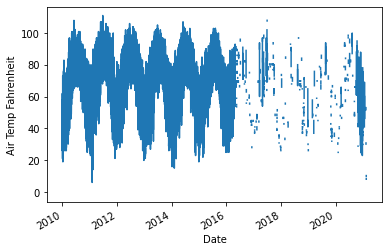

In [ ]:
weather['tmpf'] = pd.to_numeric(weather['tmpf'], errors='coerce')  # change the type of tmpf to numeric
weather['tmpf'].plot()  # look at the plot
plt.xlabel('Date')
plt.ylabel('Air Temp Fahrenheit')
plt.show()

Scroll down and you will find the data dictionary on this webpage: https://mesonet.agron.iastate.edu/request/download.phtml

In [ ]:
# convert a selected list of variables to numerical
convert_list = ['dwpf', 'relh', 'drct', 'sknt', 'alti', 'mslp', 'vsby', 'gust', 'feel']
for i in convert_list:
  weather[i] = pd.to_numeric(weather[i], errors='coerce')  # fill the "M" value with NA

print(weather.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 581124 entries, 2010-01-01 00:53:00 to 2021-02-19 23:55:00
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   station            581124 non-null  object        
 1   valid              581124 non-null  datetime64[ns]
 2   tmpf               107334 non-null  float64       
 3   dwpf               107288 non-null  float64       
 4   relh               106558 non-null  float64       
 5   drct               567128 non-null  float64       
 6   sknt               573647 non-null  float64       
 7   p01i               581124 non-null  object        
 8   alti               464695 non-null  float64       
 9   mslp               95785 non-null   float64       
 10  vsby               579833 non-null  float64       
 11  gust               51652 non-null   float64       
 12  skyc1              581124 non-null  object        
 13  skyc2     

In [ ]:
# After going through all the variables, we selected some of them for further analysis
features = ['station', 'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'alti', 'mslp', 'vsby', 'gust', 'feel', 'skyc1']
weather = weather[features]
print(weather.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 581124 entries, 2010-01-01 00:53:00 to 2021-02-19 23:55:00
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   station  581124 non-null  object 
 1   tmpf     107334 non-null  float64
 2   dwpf     107288 non-null  float64
 3   relh     106558 non-null  float64
 4   drct     567128 non-null  float64
 5   sknt     573647 non-null  float64
 6   alti     464695 non-null  float64
 7   mslp     95785 non-null   float64
 8   vsby     579833 non-null  float64
 9   gust     51652 non-null   float64
 10  feel     98657 non-null   float64
 11  skyc1    581124 non-null  object 
dtypes: float64(10), object(2)
memory usage: 57.6+ MB
None


In [ ]:
# resample to the same hourly data as the demand dataset
# Use max for the numerical variables, and first for categorical variables; we shifted
weather = weather.resample('H').apply({"station":"first", "tmpf":"max", "dwpf":"max", "relh":"max",
                    "drct":"max", "sknt":"max", "alti":"max", "mslp":"max", "vsby":"max",
                    "gust":"max", "feel":"max", "skyc1":"first"})
print(weather.info())
weather.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97632 entries, 2010-01-01 00:00:00 to 2021-02-19 23:00:00
Freq: H
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  96325 non-null  object 
 1   tmpf     95936 non-null  float64
 2   dwpf     95928 non-null  float64
 3   relh     95263 non-null  float64
 4   drct     94324 non-null  float64
 5   sknt     95686 non-null  float64
 6   alti     96273 non-null  float64
 7   mslp     95697 non-null  float64
 8   vsby     96058 non-null  float64
 9   gust     34615 non-null  float64
 10  feel     87885 non-null  float64
 11  skyc1    96325 non-null  object 
dtypes: float64(10), object(2)
memory usage: 9.7+ MB
None


,station,tmpf,dwpf,relh,drct,sknt,alti,mslp,vsby,gust,feel,skyc1
valid,,,,,,,,,,,,
2010-01-01 00:00:00,FST,30.02,24.98,81.27,180.0,5.0,30.50,1031.8,10.0,NaN,24.04,CLR
2010-01-01 01:00:00,FST,28.04,24.08,84.87,190.0,5.0,30.49,1031.3,10.0,NaN,21.69,CLR
2010-01-01 02:00:00,FST,26.96,23.00,84.80,220.0,9.0,30.47,1030.9,10.0,NaN,17.25,CLR
2010-01-01 03:00:00,FST,26.96,23.00,84.80,210.0,8.0,30.46,1030.4,10.0,NaN,17.90,CLR
2010-01-01 04:00:00,FST,28.04,23.00,81.11,220.0,12.0,30.44,1030.0,10.0,NaN,16.96,CLR


In [ ]:
# It appears to have a lot of missing values.
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97632 entries, 2010-01-01 00:00:00 to 2021-02-19 23:00:00
Freq: H
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  96325 non-null  object 
 1   tmpf     95936 non-null  float64
 2   dwpf     95928 non-null  float64
 3   relh     95263 non-null  float64
 4   drct     94324 non-null  float64
 5   sknt     95686 non-null  float64
 6   alti     96273 non-null  float64
 7   mslp     95697 non-null  float64
 8   vsby     96058 non-null  float64
 9   gust     34615 non-null  float64
 10  feel     87885 non-null  float64
 11  skyc1    96325 non-null  object 
dtypes: float64(10), object(2)
memory usage: 9.7+ MB


# Data resampling and cleaning

In [ ]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97848 entries, 2010-01-01 01:00:00 to 2021-03-01 00:00:00
Freq: H
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MWh     97848 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


In [ ]:
# Join the two datasets based on the index of demand
df = energy.join(weather, on=energy.index, how='left')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97848 entries, 2010-01-01 01:00:00 to 2021-03-01 00:00:00
Freq: H
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MWh      97848 non-null  float64
 1   station  96324 non-null  object 
 2   tmpf     95935 non-null  float64
 3   dwpf     95927 non-null  float64
 4   relh     95262 non-null  float64
 5   drct     94323 non-null  float64
 6   sknt     95685 non-null  float64
 7   alti     96272 non-null  float64
 8   mslp     95696 non-null  float64
 9   vsby     96057 non-null  float64
 10  gust     34615 non-null  float64
 11  feel     87884 non-null  float64
 12  skyc1    96324 non-null  object 
dtypes: float64(11), object(2)
memory usage: 10.5+ MB
None


,MWh,station,tmpf,dwpf,relh,drct,sknt,alti,mslp,vsby,gust,feel,skyc1
Date_Time,,,,,,,,,,,,,
2010-01-01 01:00:00,32094.064435,FST,28.04,24.08,84.87,190.0,5.0,30.49,1031.3,10.0,NaN,21.69,CLR
2010-01-01 02:00:00,32171.322546,FST,26.96,23.00,84.80,220.0,9.0,30.47,1030.9,10.0,NaN,17.25,CLR
2010-01-01 03:00:00,32241.752463,FST,26.96,23.00,84.80,210.0,8.0,30.46,1030.4,10.0,NaN,17.90,CLR
2010-01-01 04:00:00,32459.193227,FST,28.04,23.00,81.11,220.0,12.0,30.44,1030.0,10.0,NaN,16.96,CLR
2010-01-01 05:00:00,33123.751047,FST,26.96,23.00,84.80,220.0,11.0,30.42,1029.7,10.0,NaN,16.10,CLR


In [ ]:
# split the data into training and testing to avoid data leakage
training_data = df[:'2019']
# training_data.to_csv('/content/train.csv')
testing_data = df['2020']
# testing_data.to_csv('/content/test.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


# Feature engineering

what other variables did you create based on the time/date stamp and the weather variables?

## Import data

In [ ]:
# Access to the training data
!gdown --id 1IDxqjMBXPRycu-oBRuWKGK42YfDZ2wHb
# Access to the testing data (save for later)
!gdown --id 1FD-Qfn9vNVyBg7JmxvSCEpIgBL5unVQw

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1IDxqjMBXPRycu-oBRuWKGK42YfDZ2wHb
To: /content/train.csv
100% 8.46M/8.46M [00:00<00:00, 56.3MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1FD-Qfn9vNVyBg7JmxvSCEpIgBL5unVQw
To: /content/test.csv
100% 790k/790k [00:00<00:00, 41.9MB/s]


In [ ]:
# read in our training data
df = pd.read_csv('/content/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87647 entries, 0 to 87646
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date_Time  87647 non-null  object 
 1   MWh        87647 non-null  float64
 2   station    86436 non-null  object 
 3   tmpf       86091 non-null  float64
 4   dwpf       86083 non-null  float64
 5   relh       85418 non-null  float64
 6   drct       84513 non-null  float64
 7   sknt       85851 non-null  float64
 8   alti       86384 non-null  float64
 9   mslp       85872 non-null  float64
 10  vsby       86229 non-null  float64
 11  gust       31999 non-null  float64
 12  feel       83406 non-null  float64
 13  skyc1      86436 non-null  object 
dtypes: float64(11), object(3)
memory usage: 9.4+ MB


In [ ]:
# convert the 'Date_Time' column to datetime type
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

Generate more features based on time

In [ ]:
# based on the 'Date_Time' column, we extract a few features for further analysis
df['hour'] = df['Date_Time'].dt.hour  # extract hour
df['date_month'] = df['Date_Time'].dt.month  # extract month
df['date_week'] = df['Date_Time'].dt.weekofyear  # extract week of the year
df['date_month_name'] = df['Date_Time'].dt.month_name()  # extract month name
df['date_day'] = df['Date_Time'].dt.day  # extract day
df['date_dow_name'] = df['Date_Time'].dt.day_name()  # extract day of week name
df['date_dow'] = df['Date_Time'].dt.dayofweek  # extract day of week - Monday = 0 , Sunday = 6
df['quarter'] = df['Date_Time'].dt.quarter  # extract quarter
df['date_is_weekend'] = np.where(df['date_dow_name'].isin(['Sunday', 'Saturday']), 1,0)  # check whether the day is weekend or not

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [ ]:
import holidays
df['holiday'] = df['Date_Time'].apply(lambda x: 0 if holidays.US().get(x) is None else 1)  # check whether day is a US holiday

In [ ]:
# set the 'Date_Time' column to the index
df = df.set_index('Date_Time')
df.head()

,MWh,station,tmpf,dwpf,relh,drct,sknt,alti,mslp,vsby,...,hour,date_month,date_week,date_month_name,date_day,date_dow_name,date_dow,quarter,date_is_weekend,holiday
Date_Time,,,,,,,,,,,,,,,,,,,,,
2010-01-01 01:00:00,32094.064435,FST,28.04,24.08,84.87,190.0,5.0,30.49,1031.3,10.0,...,1,1,53,January,1,Friday,4,1,0,1
2010-01-01 02:00:00,32171.322546,FST,26.96,23.00,84.80,220.0,9.0,30.47,1030.9,10.0,...,2,1,53,January,1,Friday,4,1,0,1
2010-01-01 03:00:00,32241.752463,FST,26.96,23.00,84.80,210.0,8.0,30.46,1030.4,10.0,...,3,1,53,January,1,Friday,4,1,0,1
2010-01-01 04:00:00,32459.193227,FST,28.04,23.00,81.11,220.0,12.0,30.44,1030.0,10.0,...,4,1,53,January,1,Friday,4,1,0,1
2010-01-01 05:00:00,33123.751047,FST,26.96,23.00,84.80,220.0,11.0,30.42,1029.7,10.0,...,5,1,53,January,1,Friday,4,1,0,1


In [ ]:
# function to extract part of the day

def day_part(hour):
    if hour in [4,5]:
        return "dawn"
    elif hour in [6,7]:
        return "early morning"
    elif hour in [8,9,10]:
        return "late morning"
    elif hour in [11,12,13]:
        return "noon"
    elif hour in [14,15,16]:
        return "afternoon"
    elif hour in [17, 18,19]:
        return "evening"
    elif hour in [20, 21, 22]:
        return "night"
    elif hour in [23,24,0,1,2,3]:
        return "midnight"
    
    
# utilize it along with apply method
df['day_part'] = df['hour'].apply(day_part)

Generate more features using Rolling average and Expanding average

In [ ]:
# deal with the many missing values
df['tmpf'].ffill(inplace=True)
df['dwpf'].ffill(inplace=True)
df['relh'].ffill(inplace=True)
df['drct'].ffill(inplace=True)
df['sknt'].ffill(inplace=True)
df['alti'].ffill(inplace=True)
df['mslp'].ffill(inplace=True)
df['vsby'].ffill(inplace=True)
df.drop('gust', axis=1, inplace=True)  # too many missing values, we should drop this feature
df['feel'].ffill(inplace=True)
df['skyc1'].ffill(inplace=True)

In [ ]:
# Rolling averages for tmpf, dwpf,tmpf for 5,10,24,48 hours. 

df['roll 5 tmpf'] = df['tmpf'].rolling(window=5).mean()
df['roll 5 dwpf'] = df['dwpf'].rolling(window=5).mean()
df['roll 5 relh'] = df['relh'].rolling(window=5).mean()

df['roll 10 tmpf'] = df['tmpf'].rolling(window=10).mean()
df['roll 10 dwpf'] = df['dwpf'].rolling(window=10).mean()
df['roll 10 relh'] = df['relh'].rolling(window=10).mean()

df['roll 24 tmpf'] = df['tmpf'].rolling(window=24).mean()
df['roll 24 dwpf'] = df['dwpf'].rolling(window=24).mean()
df['roll 24 relh'] = df['relh'].rolling(window=24).mean()

df['roll 48 tmpf'] = df['tmpf'].rolling(window=48).mean()
df['roll 48 dwpf'] = df['dwpf'].rolling(window=48).mean()
df['roll 48 relh'] = df['relh'].rolling(window=48).mean()

In [ ]:
df.head()

,MWh,station,tmpf,dwpf,relh,drct,sknt,alti,mslp,vsby,...,roll 5 relh,roll 10 tmpf,roll 10 dwpf,roll 10 relh,roll 24 tmpf,roll 24 dwpf,roll 24 relh,roll 48 tmpf,roll 48 dwpf,roll 48 relh
Date_Time,,,,,,,,,,,,,,,,,,,,,
2010-01-01 01:00:00,32094.064435,FST,28.04,24.08,84.87,190.0,5.0,30.49,1031.3,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,32171.322546,FST,26.96,23.00,84.80,220.0,9.0,30.47,1030.9,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 03:00:00,32241.752463,FST,26.96,23.00,84.80,210.0,8.0,30.46,1030.4,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 04:00:00,32459.193227,FST,28.04,23.00,81.11,220.0,12.0,30.44,1030.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 05:00:00,33123.751047,FST,26.96,23.00,84.80,220.0,11.0,30.42,1029.7,10.0,...,84.076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Expanding averages for tmpf, dwpf,tmpf for 5,10,24,48 hours. 

df['exp 5 tmpf'] = df['tmpf'].expanding(5).mean()
df['exp 5 dwpf'] = df['dwpf'].expanding(5).mean()
df['exp 5 relh'] = df['relh'].expanding(5).mean()

df['exp 10 tmpf'] = df['tmpf'].expanding(10).mean()
df['exp 10 dwpf'] = df['dwpf'].expanding(10).mean()
df['exp 10 relh'] = df['relh'].expanding(10).mean()

df['exp 24 tmpf'] = df['tmpf'].expanding(24).mean()
df['exp 24 dwpf'] = df['dwpf'].expanding(24).mean()
df['exp 24 relh'] = df['relh'].expanding(24).mean()

df['exp 48 tmpf'] = df['tmpf'].expanding(48).mean()
df['exp 48 dwpf'] = df['dwpf'].expanding(48).mean()
df['exp 48 relh'] = df['relh'].expanding(48).mean()

In [ ]:
df.head()

,MWh,station,tmpf,dwpf,relh,drct,sknt,alti,mslp,vsby,...,exp 5 relh,exp 10 tmpf,exp 10 dwpf,exp 10 relh,exp 24 tmpf,exp 24 dwpf,exp 24 relh,exp 48 tmpf,exp 48 dwpf,exp 48 relh
Date_Time,,,,,,,,,,,,,,,,,,,,,
2010-01-01 01:00:00,32094.064435,FST,28.04,24.08,84.87,190.0,5.0,30.49,1031.3,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,32171.322546,FST,26.96,23.00,84.80,220.0,9.0,30.47,1030.9,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 03:00:00,32241.752463,FST,26.96,23.00,84.80,210.0,8.0,30.46,1030.4,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 04:00:00,32459.193227,FST,28.04,23.00,81.11,220.0,12.0,30.44,1030.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 05:00:00,33123.751047,FST,26.96,23.00,84.80,220.0,11.0,30.42,1029.7,10.0,...,84.076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,MWh,tmpf,dwpf,relh,drct,sknt,alti,mslp,vsby,feel,...,exp 5 relh,exp 10 tmpf,exp 10 dwpf,exp 10 relh,exp 24 tmpf,exp 24 dwpf,exp 24 relh,exp 48 tmpf,exp 48 dwpf,exp 48 relh
count,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,87647.000000,...,87643.000000,87638.000000,87638.000000,87638.000000,87624.000000,87624.000000,87624.000000,87600.000000,87600.000000,87600.000000
mean,39538.034020,66.903714,42.112172,47.779181,183.936587,10.220281,30.039894,1013.357501,9.826375,65.382258,...,45.591458,66.055387,39.675102,45.589357,66.059813,39.678254,45.587529,66.066604,39.683285,45.585854
std,9582.395262,17.442389,17.088370,24.409660,86.359620,4.831050,0.165762,6.551965,1.452774,18.840847,...,2.806879,3.914452,3.065321,2.793115,3.898689,3.055376,2.787322,3.877536,3.040595,2.785766
min,21797.729230,-0.900000,-23.980000,1.190000,0.000000,0.000000,29.410000,990.500000,-99.000000,-15.320000,...,41.170407,29.516000,19.049474,41.170407,36.533626,19.700000,41.170407,36.533626,19.769000,41.170407
25%,32722.077577,54.000000,28.040000,28.070000,140.000000,7.000000,29.930000,1009.000000,10.000000,53.960000,...,42.912318,66.490918,38.703315,42.912308,66.491106,38.704266,42.911951,66.491444,38.705473,42.911782
50%,37409.246563,69.080000,44.060000,45.140000,170.000000,10.000000,30.030000,1012.500000,10.000000,69.080000,...,46.136100,66.847911,40.097334,46.136043,66.848104,40.099595,46.135888,66.848322,40.103610,46.135553
75%,44586.329286,80.060000,57.900000,66.130000,240.000000,13.000000,30.140000,1017.000000,10.000000,80.240000,...,47.166087,67.206646,41.487968,47.165946,67.206744,41.488167,47.165532,67.207046,41.488272,47.164935
max,74665.579486,111.020000,73.940000,100.000000,360.000000,56.000000,30.800000,1043.500000,10.000000,106.090000,...,84.076000,68.955387,45.908140,75.993000,68.955387,45.908140,64.597850,68.955387,45.908140,64.597850


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87647 entries, 2010-01-01 01:00:00 to 2019-12-31 23:00:00
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MWh              87647 non-null  float64
 1   station          86436 non-null  object 
 2   tmpf             87647 non-null  float64
 3   dwpf             87647 non-null  float64
 4   relh             87647 non-null  float64
 5   drct             87647 non-null  float64
 6   sknt             87647 non-null  float64
 7   alti             87647 non-null  float64
 8   mslp             87647 non-null  float64
 9   vsby             87647 non-null  float64
 10  feel             87647 non-null  float64
 11  skyc1            87647 non-null  object 
 12  hour             87647 non-null  int64  
 13  date_month       87647 non-null  int64  
 14  date_week        87647 non-null  int64  
 15  date_month_name  87647 non-null  object 
 16  date_day         87647 

## Feature selection

After trying different combinations of features, the following results in the best performance

In [ ]:
tmp = df.loc[:,['MWh','tmpf','dwpf','relh','roll 10 tmpf','roll 10 dwpf','roll 10 relh','exp 10 tmpf','exp 10 dwpf','exp 10 relh']]
tmp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87647 entries, 2010-01-01 01:00:00 to 2019-12-31 23:00:00
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MWh           87647 non-null  float64
 1   tmpf          87647 non-null  float64
 2   dwpf          87647 non-null  float64
 3   relh          87647 non-null  float64
 4   roll 10 tmpf  87638 non-null  float64
 5   roll 10 dwpf  87638 non-null  float64
 6   roll 10 relh  87638 non-null  float64
 7   exp 10 tmpf   87638 non-null  float64
 8   exp 10 dwpf   87638 non-null  float64
 9   exp 10 relh   87638 non-null  float64
dtypes: float64(10)
memory usage: 7.4 MB


In [ ]:
# we have a few missing values due to rolling average and expending average
tmp.dropna(inplace=True)
tmp

,MWh,tmpf,dwpf,relh,roll 10 tmpf,roll 10 dwpf,roll 10 relh,exp 10 tmpf,exp 10 dwpf,exp 10 relh
Date_Time,,,,,,,,,,
2010-01-01 10:00:00,35765.174232,42.08,21.02,42.69,29.516,22.388,75.993,29.516000,22.388000,75.993000
2010-01-01 11:00:00,34908.264048,48.92,17.06,27.79,31.604,21.686,70.285,31.280000,21.903636,71.610909
2010-01-01 12:00:00,33582.901320,53.96,12.02,18.51,34.304,20.588,63.656,33.170000,21.080000,67.185833
2010-01-01 13:00:00,32038.688729,57.02,14.00,18.07,37.310,19.688,56.983,35.004615,20.535385,63.407692
2010-01-01 14:00:00,30502.942522,59.00,14.00,16.83,40.406,18.788,50.555,36.718571,20.068571,60.080714
...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,41812.983857,50.00,27.00,40.62,50.590,25.240,37.457,66.904747,42.112621,47.778500
2019-12-31 20:00:00,41079.759161,46.90,32.00,55.94,51.490,26.340,38.033,66.904519,42.112506,47.778593
2019-12-31 21:00:00,40145.543121,45.00,33.10,62.83,51.690,27.350,39.836,66.904269,42.112403,47.778765


In [ ]:
# normalize the numeric features
target = tmp[['MWh']]
num_var = tmp.drop(['MWh'], axis=1)

mean = num_var.mean()  # store the mean for the testing dataset
std = num_var.std()  # store the std for the testing dataset

num_var = (num_var-mean)/std  # normalization

In [ ]:
# merge back our dataset
tmp = pd.concat([num_var,target], axis=1)
tmp

,tmpf,dwpf,relh,roll 10 tmpf,roll 10 dwpf,roll 10 relh,exp 10 tmpf,exp 10 dwpf,exp 10 relh,MWh
Date_Time,,,,,,,,,,
2010-01-01 10:00:00,-1.423701,-1.234437,-0.208365,-2.279124,-1.186930,1.288836,-9.334483,-5.639573,10.885208,35765.174232
2010-01-01 11:00:00,-1.031473,-1.466178,-0.818804,-2.151852,-1.229171,1.028109,-8.883845,-5.797587,9.316318,34908.264048
2010-01-01 12:00:00,-0.742463,-1.761120,-1.198997,-1.987276,-1.295239,0.725312,-8.401019,-6.066282,7.732039,33582.901320
2010-01-01 13:00:00,-0.566993,-1.645250,-1.217023,-1.804047,-1.349394,0.420506,-7.932341,-6.243952,6.379377,32038.688729
2010-01-01 14:00:00,-0.453453,-1.645250,-1.267825,-1.615333,-1.403548,0.126890,-7.494488,-6.396241,5.188241,30502.942522
...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,-0.969542,-0.884486,-0.293171,-0.994576,-1.015321,-0.471394,0.216981,0.795192,0.783764,41812.983857
2019-12-31 20:00:00,-1.147306,-0.591885,0.334475,-0.939717,-0.949132,-0.445084,0.216922,0.795154,0.783797,41079.759161
2019-12-31 21:00:00,-1.256259,-0.527512,0.616752,-0.927526,-0.888359,-0.362727,0.216859,0.795121,0.783859,40145.543121


In [ ]:
from numpy import array

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in np.arange(len(sequences)): # be careful of this line!
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
# try a lookback period of 15
raw_seq = np.array(tmp)  # make sure your data is stored as a numpy array!
X_train, y_train = split_sequences(raw_seq, n_steps=15)

In [ ]:
# check for the shape
X_train.shape, y_train.shape

((87624, 15, 9), (87624,))

# Basic EDA and statistics

used to help motivate the modeling (at least two plots and tables, with nice descriptions)


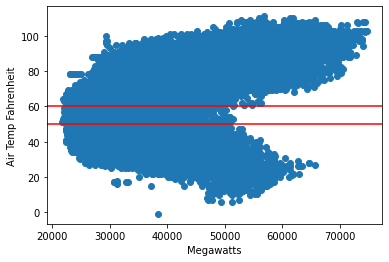

In [ ]:
# shows most megawatts used in higher (summer = Air Conditioning) and lower (winter = heating)
# temperatures. between 50 and 60 is the lowest megawatt usage

plt.scatter(x=df.MWh, y=df.tmpf)
plt.axhline(y=50, color='r', linestyle='-')
plt.axhline(y=60, color='r', linestyle='-')
plt.xlabel('Megawatts')
plt.ylabel('Air Temp Fahrenheit')
plt.show()

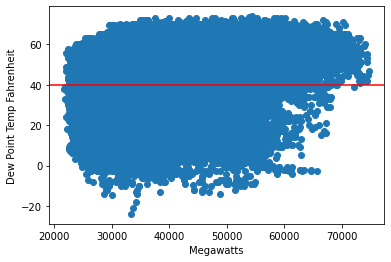

In [ ]:
# shows most megawatts used in higher dew points
# "The higher the dew point rises, the greater the amount of
# moisture in the air. This directly affects how "comfortable" it will feel outside."
# higher dew point = less comfortable = means more AC

plt.scatter(x=df.MWh, y=df.dwpf)
plt.axhline(y=40, color='r', linestyle='-')
plt.xlabel('Megawatts')
plt.ylabel('Dew Point Temp Fahrenheit')
plt.show()

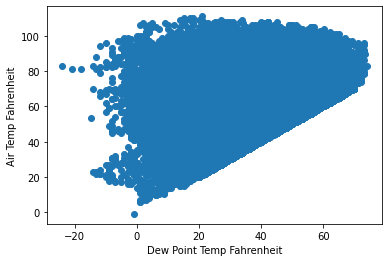

In [ ]:
# just shows the greater the dew point the greater the temp
# "The higher the dew point rises, the greater the amount of
# moisture in the air. This directly affects how "comfortable" it will feel outside."

plt.scatter(x=df.dwpf, y=df.tmpf)
plt.xlabel('Dew Point Temp Fahrenheit')
plt.ylabel('Air Temp Fahrenheit')
plt.show()

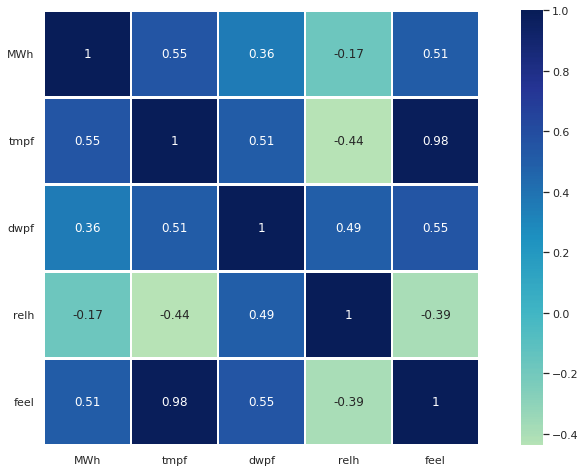

In [ ]:
p1 = df[['MWh','tmpf','dwpf','relh','feel']]
corr = p1.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, annot=True, square=True, cmap="YlGnBu", center=0, linewidths=1.5)
plt.yticks(rotation=0)
plt.show()

#strong correlation between tmpf and feel but we've decided not to end up using feel variable regardless. 
#out of the three temperature variables that we plan on using, tmpf has the strong correlation with our target variable MWh

# Model

your best fitting model - with loss curves and error metrics for both train and test partition. You may load the weights from your best fitting model. 


In [ ]:
### We tried different structures, this one turns out to be the best

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D

# define what you need
n_steps = X_train.shape[1]
n_features = X_train.shape[2]

# define model
model = Sequential()
model.add(Conv1D(filters=32,  # apply a Conv1D layer
          kernel_size=2, 
          input_shape=(n_steps,n_features)))
model.add(MaxPooling1D(3))  # use max pooling to down sampling
model.add((LSTM(64,activation='relu', return_sequences=False, recurrent_dropout=0.5)))  # feed in the LSTM layer and set return_sequences to false, since we only have one RNN layer
model.add(Dropout(0.5))  # apply large dropout to avoid overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))  # apply large dropout to avoid overfitting
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 14, 32)            608       
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 4, 32)            0         
 g1D)                                                            
                                                                 
 lstm_17 (LSTM)              (None, 64)                24832     
                                                                 
 dropout_43 (Dropout)        (None, 64)                0         
                                                                 
 dense_36 (Dense)            (None, 64)                4160      
                                                                 
 dropout_44 (Dropout)        (None, 64)                0         
                                                     

In [ ]:
model.compile(optimizer='rmsprop',  # rmsprop seems to work the best on the model
              loss='mse',
              metrics=['mae'])

from keras.callbacks import EarlyStopping

# use an early stopping technique to monitor the training process
es = EarlyStopping(monitor='val_loss', mode='min', 
                   patience=10,  # with patience of 10
                   verbose=1,
                   restore_best_weights=True)  # restore the best weights from the training process

In [ ]:
# fit the model
history = model.fit(X_train, y_train,
            epochs=100,
            batch_size=128,  # a decent amount of batch size gives the best performance and reduce the training time
            validation_split=0.2,  # we use a validation split to generate the validation dataset
            shuffle=True,  # shuffle the data could improve the model performance
            callbacks=[es])  # with our early stopping

Epoch 1/100
548/548 [==============================] - 13s 17ms/step - loss: 365513728.0000 - mae: 14895.3848 - val_loss: 100620992.0000 - val_mae: 7876.1816
Epoch 2/100
548/548 [==============================] - 7s 13ms/step - loss: 146866448.0000 - mae: 9527.7627 - val_loss: 83802168.0000 - val_mae: 7233.5669
Epoch 3/100
548/548 [==============================] - 7s 13ms/step - loss: 133571000.0000 - mae: 9060.8770 - val_loss: 66841904.0000 - val_mae: 6445.2681
Epoch 4/100
548/548 [==============================] - 7s 13ms/step - loss: 122620112.0000 - mae: 8684.5420 - val_loss: 99365592.0000 - val_mae: 8264.3496
Epoch 5/100
548/548 [==============================] - 8s 14ms/step - loss: 112813872.0000 - mae: 8332.8506 - val_loss: 39421992.0000 - val_mae: 4820.5303
Epoch 6/100
548/548 [==============================] - 7s 13ms/step - loss: 103274488.0000 - mae: 7962.9404 - val_loss: 56057184.0000 - val_mae: 6040.0869
Epoch 7/100
548/548 [==============================] - 7s 13ms/step

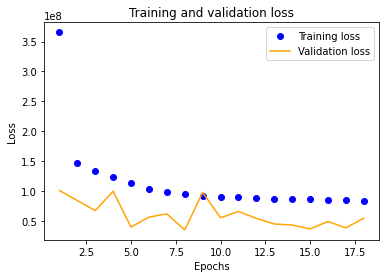

In [ ]:
import matplotlib.pyplot as plt

# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # get the loss values
val_loss_values = history_dict['val_loss'] # get the validation loss values

epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)

plt.plot(epochs, loss_values, 'bo', label='Training loss')  # plot training loss and epochs
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')  # plot validation loss and epochs

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()  # loss v.s. epochs

# Model Inspection

We are using the testing data for our final model evaluation.

In [ ]:
!gdown --id 1ZwviGKltXq8Vml2BF104NZeUGfjBlVaz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ZwviGKltXq8Vml2BF104NZeUGfjBlVaz
To: /content/RNN_Final.h5
100% 309k/309k [00:00<00:00, 78.0MB/s]


In [ ]:
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('/content/RNN_Final.h5')
# summarize model.
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 14, 32)            608       
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 4, 32)            0         
 g1D)                                                            
                                                                 
 lstm_17 (LSTM)              (None, 64)                24832     
                                                                 
 dropout_43 (Dropout)        (None, 64)                0         
                                                                 
 dense_36 (Dense)            (None, 64)                4160      
                                                                 
 dropout_44 (Dropout)        (None, 64)                0         
                                                     

## Data preprocessing for the test dataset

Same process as above

In [ ]:
# read in test data
test_df = pd.read_csv('/content/test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date_Time  8784 non-null   object 
 1   MWh        8784 non-null   float64
 2   station    8720 non-null   object 
 3   tmpf       8681 non-null   float64
 4   dwpf       8681 non-null   float64
 5   relh       8681 non-null   float64
 6   drct       8642 non-null   float64
 7   sknt       8666 non-null   float64
 8   alti       8720 non-null   float64
 9   mslp       8663 non-null   float64
 10  vsby       8660 non-null   float64
 11  gust       2463 non-null   float64
 12  feel       3829 non-null   float64
 13  skyc1      8720 non-null   object 
dtypes: float64(11), object(3)
memory usage: 960.9+ KB


In [ ]:
# convert to datetime type
test_df['Date_Time'] = pd.to_datetime(test_df['Date_Time'])

In [ ]:
# do some feature extraction
test_df['hour'] = test_df['Date_Time'].dt.hour #extract hour
test_df['date_month'] = test_df['Date_Time'].dt.month #extract month
test_df['date_week'] = test_df['Date_Time'].dt.weekofyear #extract week of the year
test_df['date_month_name'] = test_df['Date_Time'].dt.month_name() #extract month name
test_df['date_day'] = test_df['Date_Time'].dt.day #extract day
test_df['date_dow_name'] = test_df['Date_Time'].dt.day_name() #extract day of week name
test_df['date_dow'] = test_df['Date_Time'].dt.dayofweek #extract day of week - Monday = 0 , Sunday = 6
test_df['quarter'] = test_df['Date_Time'].dt.quarter #extract quarter
test_df['date_is_weekend'] = np.where(test_df['date_dow_name'].isin(['Sunday', 'Saturday']), 1,0) #check whether the day is weekend or not

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [ ]:
# find the US holiday
test_df['holiday'] = test_df['Date_Time'].apply(lambda x: 0 if holidays.US().get(x) is None else 1) #check whether day is a US holiday

In [ ]:
# using the same function to find the periods within one day
test_df['day_part'] = test_df['hour'].apply(day_part)

In [ ]:
# set the 'Date_Time' as the index
test_df = test_df.set_index('Date_Time')
test_df.head()

,MWh,station,tmpf,dwpf,relh,drct,sknt,alti,mslp,vsby,...,date_month,date_week,date_month_name,date_day,date_dow_name,date_dow,quarter,date_is_weekend,holiday,day_part
Date_Time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,37460.838975,FST,41.0,30.9,67.03,180.0,11.0,30.06,1015.8,10.0,...,1,1,January,1,Wednesday,2,1,0,1,midnight
2020-01-01 01:00:00,36824.115099,FST,41.0,30.9,67.03,180.0,9.0,30.05,1015.3,10.0,...,1,1,January,1,Wednesday,2,1,0,1,midnight
2020-01-01 02:00:00,36531.366488,FST,39.0,30.9,72.45,170.0,8.0,30.04,1014.5,10.0,...,1,1,January,1,Wednesday,2,1,0,1,midnight
2020-01-01 03:00:00,36072.165020,FST,39.0,30.0,69.85,190.0,7.0,30.02,1014.0,10.0,...,1,1,January,1,Wednesday,2,1,0,1,midnight
2020-01-01 04:00:00,35836.161867,FST,37.9,30.0,72.93,180.0,7.0,30.00,1013.6,10.0,...,1,1,January,1,Wednesday,2,1,0,1,dawn


In [ ]:
# since we only need to transform these three variables, just ffill these three
test_df['tmpf'].ffill(inplace=True)
test_df['dwpf'].ffill(inplace=True)
test_df['relh'].ffill(inplace=True)

In [ ]:
#Rolling averages for tmpf, dwpf,tmpf for 5,10,24,48 hours. 

test_df['roll 5 tmpf'] = test_df['tmpf'].rolling(window=5).mean()
test_df['roll 5 dwpf'] = test_df['dwpf'].rolling(window=5).mean()
test_df['roll 5 relh'] = test_df['relh'].rolling(window=5).mean()

test_df['roll 10 tmpf'] = test_df['tmpf'].rolling(window=10).mean()
test_df['roll 10 dwpf'] = test_df['dwpf'].rolling(window=10).mean()
test_df['roll 10 relh'] = test_df['relh'].rolling(window=10).mean()

test_df['roll 24 tmpf'] = test_df['tmpf'].rolling(window=24).mean()
test_df['roll 24 dwpf'] = test_df['dwpf'].rolling(window=24).mean()
test_df['roll 24 relh'] = test_df['relh'].rolling(window=24).mean()

test_df['roll 48 tmpf'] = test_df['tmpf'].rolling(window=48).mean()
test_df['roll 48 dwpf'] = test_df['dwpf'].rolling(window=48).mean()
test_df['roll 48 relh'] = test_df['relh'].rolling(window=48).mean()

In [ ]:
#Expanding averages for tmpf, dwpf,tmpf for 5,10,24,48 hours. 

test_df['exp 5 tmpf'] = test_df['tmpf'].expanding(5).mean()
test_df['exp 5 dwpf'] = test_df['dwpf'].expanding(5).mean()
test_df['exp 5 relh'] = test_df['relh'].expanding(5).mean()

test_df['exp 10 tmpf'] = test_df['tmpf'].expanding(10).mean()
test_df['exp 10 dwpf'] = test_df['dwpf'].expanding(10).mean()
test_df['exp 10 relh'] = test_df['relh'].expanding(10).mean()

test_df['exp 24 tmpf'] = test_df['tmpf'].expanding(24).mean()
test_df['exp 24 dwpf'] = test_df['dwpf'].expanding(24).mean()
test_df['exp 24 relh'] = test_df['relh'].expanding(24).mean()

test_df['exp 48 tmpf'] = test_df['tmpf'].expanding(48).mean()
test_df['exp 48 dwpf'] = test_df['dwpf'].expanding(48).mean()
test_df['exp 48 relh'] = test_df['relh'].expanding(48).mean()

## Prepare the data for prediction

In [ ]:
# select the feature we needed
tmp = test_df.loc[:,['MWh','tmpf','dwpf','relh','roll 10 tmpf','roll 10 dwpf','roll 10 relh','exp 10 tmpf','exp 10 dwpf','exp 10 relh']]
tmp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2020-01-01 00:00:00 to 2020-12-31 23:00:00
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MWh           8784 non-null   float64
 1   tmpf          8784 non-null   float64
 2   dwpf          8784 non-null   float64
 3   relh          8784 non-null   float64
 4   roll 10 tmpf  8775 non-null   float64
 5   roll 10 dwpf  8775 non-null   float64
 6   roll 10 relh  8775 non-null   float64
 7   exp 10 tmpf   8775 non-null   float64
 8   exp 10 dwpf   8775 non-null   float64
 9   exp 10 relh   8775 non-null   float64
dtypes: float64(10)
memory usage: 754.9 KB


In [ ]:
# drop the missing values due to rolling average
tmp.dropna(inplace=True)
tmp

,MWh,tmpf,dwpf,relh,roll 10 tmpf,roll 10 dwpf,roll 10 relh,exp 10 tmpf,exp 10 dwpf,exp 10 relh
Date_Time,,,,,,,,,,
2020-01-01 09:00:00,37988.181062,45.0,28.9,53.00,39.96,29.35,65.842,39.960000,29.350000,65.842000
2020-01-01 10:00:00,39005.532595,48.0,30.0,49.49,40.66,29.26,64.088,40.690909,29.409091,64.355455
2020-01-01 11:00:00,40011.210673,51.1,30.0,44.09,41.67,29.17,61.794,41.558333,29.458333,62.666667
2020-01-01 12:00:00,40405.057113,55.9,28.9,35.36,43.36,28.97,58.085,42.661538,29.415385,60.566154
2020-01-01 13:00:00,40320.725177,57.9,28.9,32.90,45.25,28.86,54.390,43.750000,29.378571,58.590000
...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,50480.019624,32.0,27.0,81.55,30.27,27.78,90.524,67.585308,41.900615,45.518559
2020-12-31 20:00:00,49349.203353,30.9,26.1,82.15,30.47,27.59,89.101,67.581130,41.898816,45.522731
2020-12-31 21:00:00,47980.656897,28.0,21.9,77.57,30.38,26.89,86.858,67.576623,41.896538,45.526380


In [ ]:
# standardize the data using the mean&std from the training dataset
target = tmp[['MWh']]
num_var = tmp.drop(['MWh'], axis=1)

num_var = (num_var-mean)/std

In [ ]:
tmp = pd.concat([num_var,target], axis=1)  # merge the X variables and taret
tmp

,tmpf,dwpf,relh,roll 10 tmpf,roll 10 dwpf,roll 10 relh,exp 10 tmpf,exp 10 dwpf,exp 10 relh,MWh
Date_Time,,,,,,,,,,
2020-01-01 09:00:00,-1.256259,-0.773298,0.214026,-1.642519,-0.768016,0.825163,-6.666421,-3.368359,7.250915,37988.181062
2020-01-01 10:00:00,-1.084229,-0.708925,0.070225,-1.599851,-0.773431,0.745045,-6.479700,-3.349082,6.718697,39005.532595
2020-01-01 11:00:00,-0.906465,-0.708925,-0.151008,-1.538287,-0.778846,0.640260,-6.258105,-3.333018,6.114072,40011.210673
2020-01-01 12:00:00,-0.631217,-0.773298,-0.508668,-1.435274,-0.790881,0.470842,-5.976276,-3.347029,5.362040,40405.057113
2020-01-01 13:00:00,-0.516531,-0.773298,-0.609452,-1.320071,-0.797500,0.302064,-5.698214,-3.359038,4.654531,40320.725177
...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,-2.001721,-0.884486,1.383693,-2.233165,-0.862485,1.952576,0.390839,0.726029,-0.025347,50480.019624
2020-12-31 20:00:00,-2.064799,-0.937154,1.408275,-2.220974,-0.873918,1.887577,0.389772,0.725442,-0.023854,49349.203353
2020-12-31 21:00:00,-2.231094,-1.182940,1.220636,-2.226460,-0.916038,1.785123,0.388620,0.724699,-0.022547,47980.656897


In [ ]:
raw_seq = np.array(tmp)  # make sure your data is stored as a numpy array!
X_test, y_test = split_sequences(raw_seq, n_steps=15)

## Model prediction

In [ ]:
result = model.predict(X_test)  # make prediction on test data
result

array([[34380.227],
       [33337.035],
       [32153.57 ],
       ...,
       [40179.01 ],
       [40190.695],
       [39861.203]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('The MAE on the test dataset is:', mean_absolute_error(y_test, result))  # calculate MAE
print('The MAPE on the test dataset is:', mean_absolute_percentage_error(y_test, result))  # calculate MAPE

The MAE on the test dataset is: 6025.397560357721
The MAPE on the test dataset is: 0.13871716809538945


# Results

This is the ‘just the facts’ section. Show scatterplots of actual vs. predicted for the train and test partition. Time series plots of actual vs. predicted. Lots of comments and text narrative cells on how the model fit. 


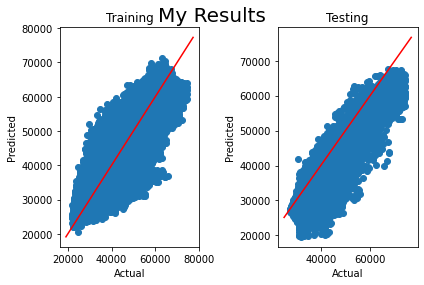

In [ ]:
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns
plt.rcParams["figure.figsize"] = (20,10)
# add a main title across top
fig.suptitle("My Results", fontsize=20)

# 	val_loss	val_mean_absolute_error	loss	mean_absolute_error

# this makes the individual subplots
# Training Results
axes[0].scatter(x = y_train, y = model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

# Validation Results
axes[1].scatter(x = y_test, y = result) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Testing")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

From the monthly prediction plot, the model seems nice.

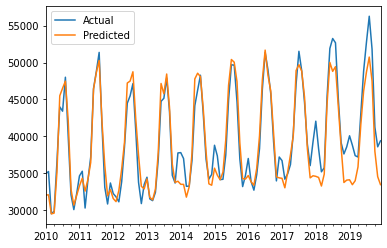

In [ ]:
# Actual vs Predicted (use a monthly resample data to look clean)
result_tain = pd.DataFrame(y_train, columns=['Actual'], index=pd.date_range('2010-01-02 00:00:00', periods=87624, freq="H").tolist())
result_tain['Predicted'] = model.predict(X_train)
result_tain = result_tain.resample('M').mean()  # resample data 
result_tain.plot()
plt.show()

From the monthly prediction plot, the model is predicting at a low value than actual.

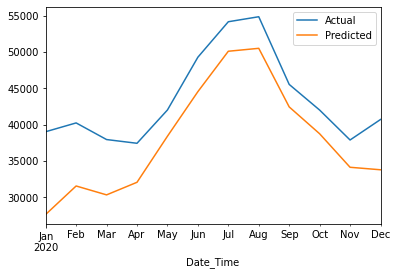

In [ ]:
# Actual vs Predicted (use a monthly resample data to look clean)
result_test = pd.DataFrame(y_test, columns=['Actual'], index=tmp.index[14:])  # since the model take 15 periods look back, the index should match
result_test['Predicted'] = result
result_test = result_test.resample('M').mean()  # resample data 
result_test.plot()
plt.show()

# Analysis



In [ ]:
result_test = pd.DataFrame(y_test, columns=['Actual'], index=tmp.index[14:])  # since the model take 15 periods look back, the index should match
result_test['Predicted'] = result
result_test['hour'] = result_test.index.hour  # extract hour
result_test['date_month'] = result_test.index.month  # extract month
result_test

,Actual,Predicted,hour,date_month
Date_Time,,,,
2020-01-01 23:00:00,37563.305700,34380.226562,23,1
2020-01-02 00:00:00,35603.631407,33337.035156,0,1
2020-01-02 01:00:00,34151.028287,32153.570312,1,1
2020-01-02 02:00:00,33204.504063,31497.896484,2,1
2020-01-02 03:00:00,32658.810864,30124.044922,3,1
...,...,...,...,...
2020-12-31 19:00:00,50480.019624,40214.355469,19,12
2020-12-31 20:00:00,49349.203353,40235.300781,20,12
2020-12-31 21:00:00,47980.656897,40179.011719,21,12


From the plot we could know the midnight times are more accurately predicted.

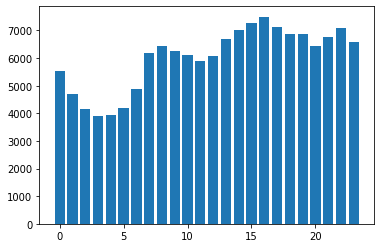

In [ ]:
MAE_hour = []
for i in range(24):
  tmp = result_test.iloc[np.where(result_test.hour==i)]
  MAE_hour.append(mean_absolute_error(tmp['Actual'],tmp['Predicted']))

plt.bar(x=list(range(24)),height=MAE_hour)
plt.show()

From the graph we could know the summer times are more accurately predicted than the winter times.

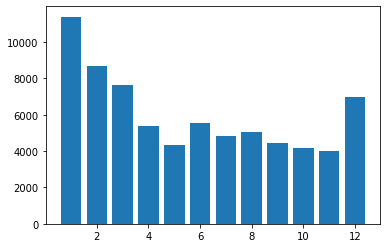

In [ ]:
MAE_month = []
for i in range(1,13):
  tmp = result_test.iloc[np.where(result_test['date_month']==i)]
  MAE_month.append(mean_absolute_error(tmp['Actual'],tmp['Predicted']))

plt.bar(x=list(range(1,13)),height=MAE_month)
plt.show()

- Overall the model is underestimating the power consumption. It's not surprising to see the model performance is better during the midnight, because people do not use electricity very much.
- However, the model performance is better in the summer times, when everybody is using their AC. The reason might be that this behavior creates a phenomenal trend that helps the model to make better prediction.
- In the winter times, Taxes is generally warm.

#Conclusion
- Initially, we have started with a very complex model that was stacked with multiple layers containing different types of machines learning algorithms, hoping that would give us some decent results. Unfortunately, that was not the case as this complex model was overfitting too much. That's when we decided to focus on running and comparing models with simple structures utilizing either simpleRNN, LSTM, or GRU. We ended up with LSTM as it gave us best results and we've built up on it as well, by adding another layer of it which helped with improving our accuracy a bit. The lesson here was simple - complex model does not necessarily mean better results and usability of it.

- Overall, after spending significant time on reconstructing our model and trying different builds and variations, we believe our model performs better than average. After multiples runs of our final model, we get our valuation's set mean absolute error to be between 4k and 7k and considering that the demand in energy varies between 20k and 70k gives a decent performance.

- We have sliced and diced the data from the two sets that were given. We're confident that what've potentially reached the threshold, or at least are close to it for what we can achieve based on the provided data. We don't expect significantly better results from applying any other variations of the model here.

- We've learned by doing this project, that perhaps it's not always only up to the structure of the model when it comes to improving our data. If we were to start this project again, we would focus more on the data itself, rather the having most of the focus on the modelling part. If we were not satisfied with the results, we would have investigated into outside sources for more data. We've had date and time as our primary column, so finding extra data based on that should not have been a problem.

- The model we've achieved could be useful for energy companies which are trying to predict demand based on certain date. For example, it could be useful for them during their budgeting and forecasting season. It would allow them look at the demand on certain future dates such as months and based on that help them better calculate their projected revenues. Also, as we know companies store extra energy and use it accordingly but storing it can be expensive. Seeing the forecast for the demand will support the company in finding that equilibrium between supply and demand which will lead to minimizing their costs and maximizing their profits.

# Participation/Roles

- Aditya(25%): Modeling, EDA, Introduction
- Andre(25%): Modeling, EDA, Feature Engineering
- Piotr(25%): Modeling, Conclusion, Introduction
- Xinbo(25%): Modeling, Data Cleaning, Analysis